<a href="https://colab.research.google.com/github/VangatiManikanthReddy/PhishingEmailDetectionUsingLLM/blob/testbranch/GeminiMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment setup

In [ ]:
# Importing all required libraries

import pandas as pd  # To handle dataframes and read/write Excel and CSV files
import os  # For working with file and folder paths
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # For evaluation metrics
import matplotlib.pyplot as plt  # For plotting charts like confusion matrix
import seaborn as sns  # For nicer/confident heatmaps of the confusion matrix


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the Actual (Ground truth ) data
!gdown --folder https://drive.google.com/drive/folders/1rw2QC7mwvBHMaPmPb_wRum6luX_oUfxv -O GroundTruthTable --quiet

In [ ]:
# Locating the file in the drive
import os

def find_folder_path(folder_name, base_path='/content/'):
    for root, dirs, files in os.walk(base_path):
        if folder_name in dirs:
            return os.path.join(root, folder_name)
    return None




In [ ]:
# Printing the path of the file
folder_name_to_search = '04 Manikanth and Anjireddy'
# path = find_folder_path(folder_name_to_search)
path = "/content/drive/MyDrive/002 SP 25 Project/04 Manikanth and Anjireddy"
print(path)

/content/drive/MyDrive/002 SP 25 Project/04 Manikanth and Anjireddy


# Load Ground Truth and Prediction Data

In [ ]:
# Function to load ground truth and prediction data from Excel files

def load_data(true_path, pred_path, id_col='id'):
    """
    Loads ground truth and prediction files.
    Optionally aligns rows based on a unique identifier (email ID).
    """

    # Read ground truth Excel file into a pandas DataFrame
    df_true = pd.read_excel(true_path)

    # Read prediction Excel file into a pandas DataFrame
    df_pred = pd.read_excel(pred_path)

    # If both files have a common ID column, align rows to match exactly
    if id_col in df_true.columns and id_col in df_pred.columns:
        df_true = df_true.sort_values(by=id_col).reset_index(drop=True)
        df_pred = df_pred.sort_values(by=id_col).reset_index(drop=True)

    # Return the aligned DataFrames
    return df_true, df_pred


# Evaluate Predictions and Plot Confusion Matrix

In [ ]:
#  Function to evaluate predictions using common classification metrics

def evaluate_predictions(df_true, df_pred, true_col, pred_col, title):
    """
    Computes classification metrics and shows a confusion matrix heatmap.
    """

    # Extract true labels from the ground truth DataFrame
    y_true = df_true[true_col].astype(int)

    # Extract predicted labels from the predictions DataFrame
    y_pred = df_pred[pred_col].astype(int)

    # Compute classification metrics
    accuracy = accuracy_score(y_true, y_pred)      # Overall accuracy
    precision = precision_score(y_true, y_pred)    # TP / (TP + FP)
    recall = recall_score(y_true, y_pred)          # TP / (TP + FN)
    f1 = f1_score(y_true, y_pred)                  # Harmonic mean of precision and recall

    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create and display heatmap of the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Legitimate', 'Phishing'],  # Predicted labels
                yticklabels=['Legitimate', 'Phishing'])  # True labels
    plt.xlabel("Predicted")  # X-axis label
    plt.ylabel("Actual")     # Y-axis label
    plt.title(f"Confusion Matrix - {title}")  # Title of the heatmap
    plt.show()

    # Return metrics as a dictionary for table storage
    return {
        "Prompt/Input": title,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1, 4)
    }


# Set Up File Paths and Storage

In [ ]:
# path = '/content/drive/MyDrive/04 Manikanth and Anjireddy'


In [ ]:
# 🧾 Setup: Define paths to all files and initialize result storage

all_results = []  # List to store evaluation results from all configurations

# Base path to ground truth Excel files
ground_truth_base = "/content/GroundTruthTable"
groundtruthCombined = pd.read_excel(os.path.join(ground_truth_base, "combined_ground_truth.xlsx"))
groundtruthHeader= pd.read_excel(os.path.join(ground_truth_base, "header_ground_truth.xlsx"))
groundtruthBody= pd.read_excel(os.path.join(ground_truth_base, "body_ground_truth.xlsx"))


# Base folder that contains zeroshot, fewshot, and cot prediction folders
predictions_base_root = os.path.join(path,'001 Submission','All APIs', 'gemini_llm','output_daata')

# Mapping of each input type to its corresponding ground truth Excel file
ground_truth_files = {
    "header": "header_ground_truth.xlsx",
    "body": "body_ground_truth.xlsx",
    "header_and_body": "combined_ground_truth.xlsx"
}

# Mapping of each prompt type (zeroshot, fewshot, cot) to folder + prediction filenames
prediction_files = {
    "zero_shot": {
        "folder": "zeroshot",  # Subfolder name in Drive
        "files": {
            "header": "header_sample_75_without_label_predicted.xlsx",
            "body": "body_sample_75_without_label_predicted.xlsx",
            "header_and_body": "header_body_sample_75_without_label_predicted.xlsx"
        }
    },
    "few_shot": {
        "folder": "fewshot",
        "files": {
            "header": "header_sample_75_without_label_fewshot_predicted.xlsx",
            "body": "body_sample_75_without_label_fewshot_predicted.xlsx",
            "header_and_body": "header_body_sample_75_without_label_fewshot_predicted.xlsx"
        }
    },
    "cot": {
        "folder": "chainofthought",
        "files": {
            "header": "header_sample_75_without_label_cot_predicted.xlsx",
            "body": "body_sample_75_without_label_cot_predicted.xlsx",
            "header_and_body": "header_body_sample_75_without_label_cot_predicted.xlsx"
        }
    }
}


In [ ]:
groundtruthCombined.head(5)

In [ ]:
groundtruthBody.head(5)

In [ ]:
groundtruthHeader.head(5)

# Evaluate All Prompt/Input Combinations

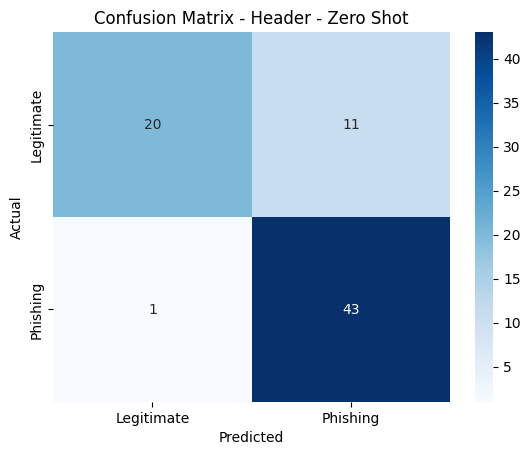

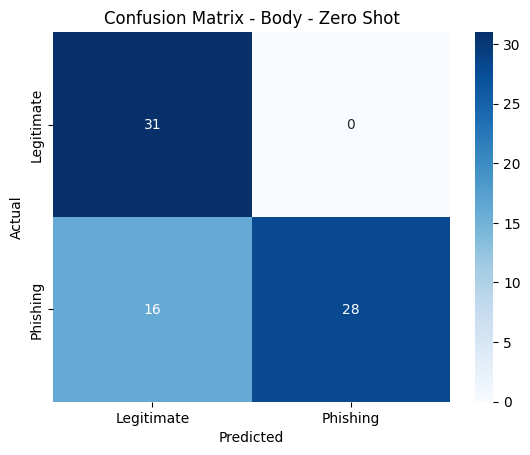

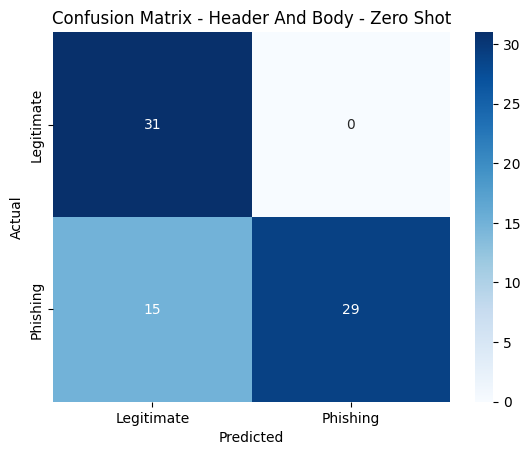

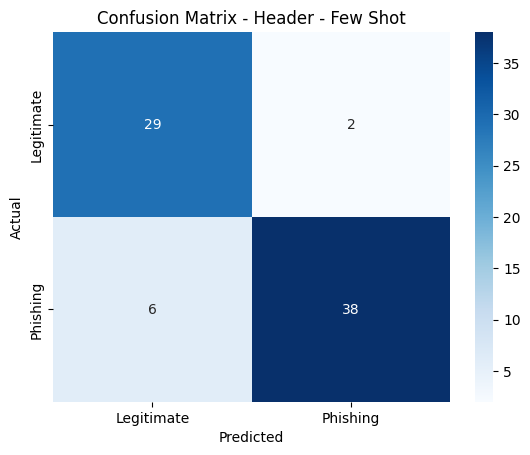

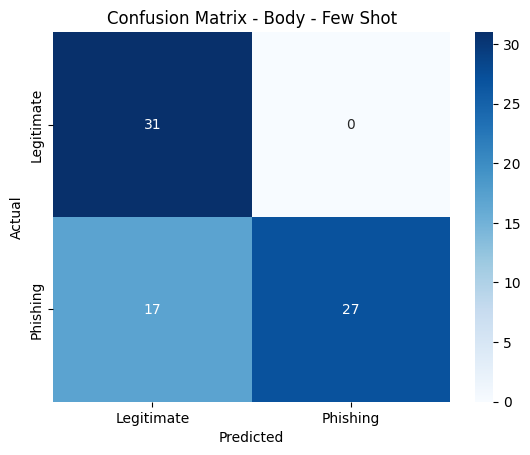

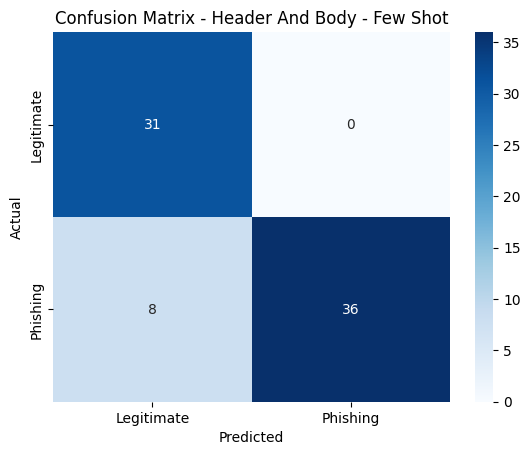

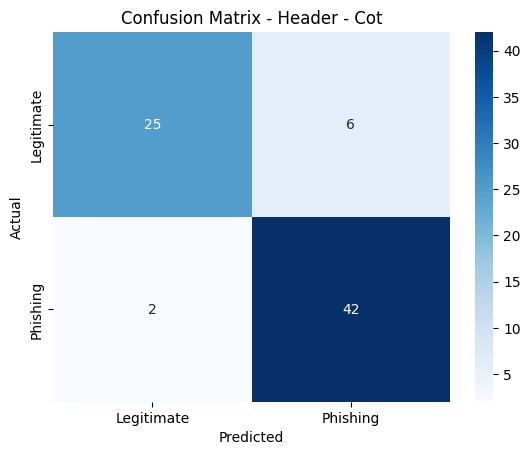

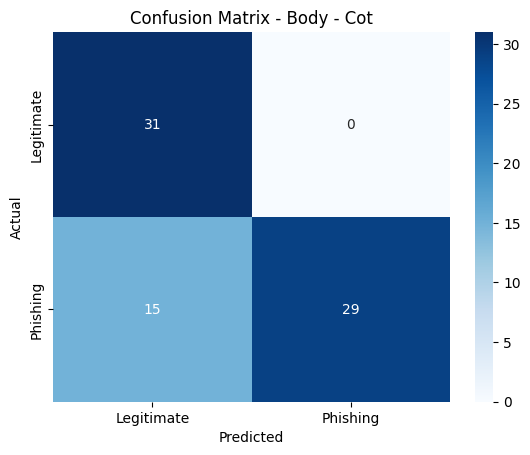

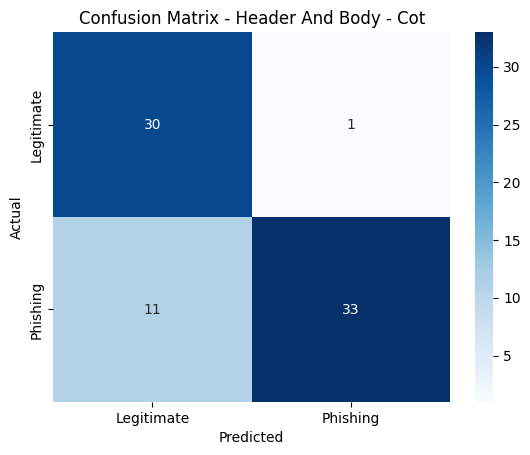

In [ ]:
# 🔁 Loop through each prompt (zero_shot, few_shot, cot) and each input type (header, body, combined)

for prompt_type, prompt_data in prediction_files.items():
    prompt_folder = os.path.join(predictions_base_root, prompt_data["folder"])  # Full path to prediction folder

    for input_type, pred_filename in prompt_data["files"].items():
        # Create title for printing/plotting (e.g., "Header - Zero Shot")
        title = f"{input_type.replace('_', ' ').title()} - {prompt_type.replace('_', ' ').title()}"

        # Full file paths for ground truth and prediction files
        true_path = os.path.join(ground_truth_base, ground_truth_files[input_type])
        pred_path = os.path.join(prompt_folder, pred_filename)

        # Check if both files exist before proceeding
        if os.path.exists(true_path) and os.path.exists(pred_path):
            # Load files
            df_true, df_pred = load_data(true_path, pred_path)

            # Evaluate and collect results
            metrics = evaluate_predictions(df_true, df_pred, true_col="label", pred_col="prediction_label", title=title)
            all_results.append(metrics)
        else:
            print(f"❌ File missing: {true_path if not os.path.exists(true_path) else pred_path}")


# Create Table and Save to excel

In [ ]:
# Create summary table and export it to Excel

# Convert collected metrics into a DataFrame
results_df = pd.DataFrame(all_results)

# Display the evaluation summary table
print("\n Summary of All Evaluation Results of Gemini:")
display(results_df)

# Define the path for the Excel output file
excel_path =os.path.join(path,'001 Submission','All APIs',  'gemini_llm', 'output_daata','evaluation_metrics_summary.xlsx')

# Save the results to an Excel file (no index column)
results_df.to_excel(excel_path, index=False)

# Confirmation message
print(f"✅ Metrics saved to Excel: {excel_path}")



 Summary of All Evaluation Results of Gemini:


,Prompt/Input,Accuracy,Precision,Recall,F1 Score
0,Header - Zero Shot,0.8400,0.7963,0.9773,0.8776
1,Body - Zero Shot,0.7867,1.0000,0.6364,0.7778
2,Header And Body - Zero Shot,0.8000,1.0000,0.6591,0.7945
3,Header - Few Shot,0.8933,0.9500,0.8636,0.9048
4,Body - Few Shot,0.7733,1.0000,0.6136,0.7606
5,Header And Body - Few Shot,0.8933,1.0000,0.8182,0.9000
6,Header - Cot,0.8933,0.8750,0.9545,0.9130
7,Body - Cot,0.8000,1.0000,0.6591,0.7945
8,Header And Body - Cot,0.8400,0.9706,0.7500,0.8462


✅ Metrics saved to Excel: /content/drive/MyDrive/002 SP 25 Project/04 Manikanth and Anjireddy/001 Submission/All APIs/gemini_llm/output_daata/evaluation_metrics_summary.xlsx


# showing in grphs

# Result Analysis and Best Model Reporting

In [ ]:
import pandas as pd
import os

# Rank the DataFrame by Accuracy in descending order (higher accuracy = better rank)
results_df['Rank'] = results_df['Accuracy'].rank(ascending=False, method='min').astype(int)

# Sort the DataFrame by Accuracy descending and then by Rank
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)

# Display the ranked evaluation summary
print("\n🏆  gemini Ranked Summary by Accuracy:")
display(results_df_sorted)

# Save the ranked results to a new Excel file
ranked_excel_path = os.path.join(path, '001 Submission', 'All APIs', 'gpt_llm', 'output_daata', 'ranked_evaluation_metrics_summary.xlsx')
results_df_sorted.to_excel(ranked_excel_path, index=False)

# Confirmation message
print(f"✅ Ranked metrics saved to Excel: {ranked_excel_path}")



🏆  gemini Ranked Summary by Accuracy:


,Prompt/Input,Accuracy,Precision,Recall,F1 Score,Rank
3,Header - Few Shot,0.8933,0.9500,0.8636,0.9048,1
6,Header - Cot,0.8933,0.8750,0.9545,0.9130,1
5,Header And Body - Few Shot,0.8933,1.0000,0.8182,0.9000,1
0,Header - Zero Shot,0.8400,0.7963,0.9773,0.8776,4
8,Header And Body - Cot,0.8400,0.9706,0.7500,0.8462,4
2,Header And Body - Zero Shot,0.8000,1.0000,0.6591,0.7945,6
7,Body - Cot,0.8000,1.0000,0.6591,0.7945,6
1,Body - Zero Shot,0.7867,1.0000,0.6364,0.7778,8
4,Body - Few Shot,0.7733,1.0000,0.6136,0.7606,9


✅ Ranked metrics saved to Excel: /content/drive/MyDrive/002 SP 25 Project/04 Manikanth and Anjireddy/001 Submission/All APIs/gpt_llm/output_daata/ranked_evaluation_metrics_summary.xlsx


In [ ]:
# Analyze and highlight the best performing configuration

# Sort results by F1 Score and show the top-performing configuration
best = results_df.sort_values(by="Accuracy", ascending=False).iloc[0]
print("\n🏆 Best Performing Configuration:")
print(best)



🏆 Best Performing Configuration:
Prompt/Input    Header - Few Shot
Accuracy                   0.8933
Precision                    0.95
Recall                     0.8636
F1 Score                   0.9048
Rank                            1
Name: 3, dtype: object
